# **Network Charts**

Network Charts, Networkx kütüphanesinin bir görselleştirme aracıdır.

Network Charts genelde social network analizinde kullanılır.

Network chartlar datada featurelar arasındaki korelasyonlarla ilgilidir.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/iris.csv') 

In [ ]:
data = data.drop(['Id'],axis=1) #görselleştirmede gerek olmadığı için id sütunu datadan çıkartılır.
                                #axis=1 demek yukarıdan aşağı yani sütun drop et demektir.

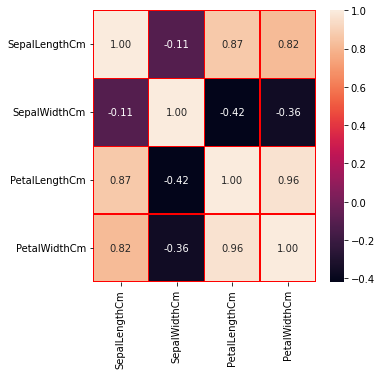

In [ ]:
f,ax = plt.subplots(figsize=(5, 5)) #figür oluşturuldu, boyutu verildi.
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax)
plt.show()

Corelation map'ten de görüleceği üzere PetalLengthCm SepalLengthCm ile pozitif yönlü bir korelasyon içerisindedir.

PetalLengthCm arttıkça SepalLengthCm 0.87 oranında artar. Çünkü ikisi doğru orantılıdır.

Iris datasette 4 tane feature var ve corelation map'ten birbirleri arasındaki ilişkiyi görülmektedir. Bunları network analizi yaparak bir network'te görselleştirmek mümkündür.

Featurelar birer node'dur. Eğer iki feature birbirine yakınsa bir threshold değeri belirlenir ve nodelar birbirine link ile bağlanır.

Mesela threshold 0.5 olursa , network aralarındaki korelasyon 0.5'ten fazla nodelar arasında oluşur.

In [ ]:
corr = data.iloc[:,0:4].corr()
links = corr.stack().reset_index()  #corealation map yapmak yerine bir table yapar.
                                    #bunun için corelation map stack edilip indeksleri resetlenir.
links.columns = ['var1', 'var2','value']
links

,var1,var2,value
0,SepalLengthCm,SepalLengthCm,1.000000
1,SepalLengthCm,SepalWidthCm,-0.109369
2,SepalLengthCm,PetalLengthCm,0.871754
3,SepalLengthCm,PetalWidthCm,0.817954
4,SepalWidthCm,SepalLengthCm,-0.109369
5,SepalWidthCm,SepalWidthCm,1.000000
6,SepalWidthCm,PetalLengthCm,-0.420516
7,SepalWidthCm,PetalWidthCm,-0.356544
8,PetalLengthCm,SepalLengthCm,0.871754
9,PetalLengthCm,SepalWidthCm,-0.420516


In [ ]:
# correlation
threshold = -1 #en küçük korelasyon değeri -1 olduğu için tüm değerlerin birbiriyle bağlantılı olması istendiğinden -1 yazılır. 

In [ ]:
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
#var1 ve var2 birbirine eşit değilse yani ikisi aynı feature değilse ve featurelar arasındaki ilişki thresholddan büyükse bir filtrenin içerisine koyulur.
links_filtered  #filtreye bakıldığında aynı featureların ortadan kalktığı görülür.

,var1,var2,value
1,SepalLengthCm,SepalWidthCm,-0.109369
2,SepalLengthCm,PetalLengthCm,0.871754
3,SepalLengthCm,PetalWidthCm,0.817954
4,SepalWidthCm,SepalLengthCm,-0.109369
6,SepalWidthCm,PetalLengthCm,-0.420516
7,SepalWidthCm,PetalWidthCm,-0.356544
8,PetalLengthCm,SepalLengthCm,0.871754
9,PetalLengthCm,SepalWidthCm,-0.420516
11,PetalLengthCm,PetalWidthCm,0.962757
12,PetalWidthCm,SepalLengthCm,0.817954


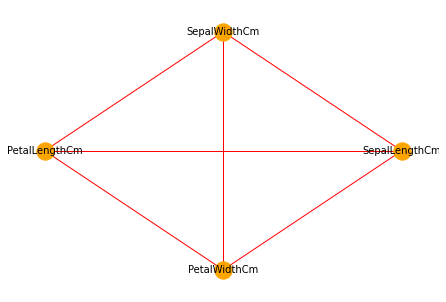

In [ ]:
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
#bir graf oluşturulur.
#bu graftaki düğümler var1 ve var2'deki featurelardır.
#düğümler arasındaki bağlantı da filtreye koyulan threshold değerinden büyük korelasyonlara göre belirlenir.
 
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=10)
#grafı görselleştirebilmek için networkx kütüphanesinin draw_circular methodu kullanılır.
#görselleştirilecek graf koyulur
#with_labels parametresiyle düğümlerin adı yazılır.

Bu grafa bakıldığında belirlenen thresholda göre tüm featureların birbiriyle ilişki içerisinde olduğu görülür.